<a href="https://colab.research.google.com/github/camille2019/Women-Capital-Trial-Analysis/blob/main/Initial_Keyword_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import sys
import re
import os

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns



In [88]:
from matplotlib.colors import LogNorm


Child/Family Crimes Analysis

2x2 matrix visualization
one axis is gender, the other axis is whether their case involved killing their child or not. in each of the 4 cells, report stats: # transcripts; # total keyword instances for keywords about parenting; normalized keyword instances (by total word count across transcripts)


In [145]:
womens_metadata =pd.read_csv('womens_metadata_10_23.csv')

mens_metadata = pd.read_csv('/content/mens_metadata_10_22.csv')

keyword_counts = pd.read_csv('/content/keyword_counts_single_gender_only.csv')

women_keyword_metadata = pd.read_csv('/content/women_keyword_metadata_10_24.csv')



mens_metadata2 = pd.read_csv("/content/Men's metadata(Sheet1) (2).csv")


/tmp/ipython-input-4002141963.py:7: DtypeWarning: Columns (23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39,41,42,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,96,97,98,99,100,101,102,103,105,106,107) have mixed types. Specify dtype option on import or set low_memory=False.
  women_keyword_metadata = pd.read_csv('/content/women_keyword_metadata_10_24.csv')


In [23]:
keyword_counts[keyword_counts['gender']=='man'].term_frequency.unique()

array([0.00000000e+00, 3.74005146e-06, 9.35012866e-05, ...,
       5.17051458e-04, 5.99479951e-05, 1.42376488e-04])

In [10]:
list(mens_metadata.columns)
ages = mens_metadata['Age of Victim']
len(ages.unique())

37

In [12]:
ages.unique()

array([nan, '80', '87, 72', '10', '29, 9', '1', '2', '13', '15, 17,18',
       '5', '79, 85, 22, 45, 54', '34', '24, 22, 22',
       '18, 16, 16, unknown', '6', '8 months', '3', '1,2,6,7,8', '42',
       '4 months', '17, 27', '30', '4', '68', '1, 5, 7', '16', '21',
       '17, 22', '20', '30, 8', '81, 19, 19', '2,1,3', '11', '24',
       'unknown', '22', '23, 15, 20, 17, 24, 14'], dtype=object)

create binary conditional for child victims based on age for men as previously done for women

In [8]:
def process_mixed_value(value):

    if isinstance(value, str):
        if ',' in value:
          return [int(num) for num in value.split(',')]

        else:
          return [int(value)]

    elif isinstance(value, int):
        return [value]

    else:
        return [value]


In [16]:

mens_metadata['Victim_age_int'] = mens_metadata['Age of Victim']
mens_metadata['Victim_age_int']= mens_metadata['Victim_age_int'].replace('4 months', 0)
mens_metadata['Victim_age_int']= mens_metadata['Victim_age_int'].replace('8 months', 0)
#remove unknnown values fron int column for analysis
mens_metadata['Victim_age_int'] = mens_metadata['Victim_age_int'].replace('18, 16, 16, unknown', '18, 16, 16')
mens_metadata['Victim_age_int'] = mens_metadata['Victim_age_int'].replace('unknown', np.nan)


mens_metadata['processed_col'] = mens_metadata['Victim_age_int'].apply(process_mixed_value)

mens_metadata['child_victim'] = mens_metadata['processed_col'].apply(lambda x: any(y <18 for y in x))


In [48]:
mens_metadata.to_csv('mens_metadata_10_28.csv')

In [19]:
women_keyword_metadata = women_keyword_metadata.drop(['Unnamed: 0.5',	'Unnamed: 0.4',	'Unnamed: 0.3',	'Unnamed: 0.2'	,'Unnamed: 0.1',	'Unnamed: 0'], axis=1)

In [33]:
mens_metadata['Name2'] = mens_metadata['Name']
mens_metadata['Name'] = mens_metadata['full_name']

In [42]:
keywords_metadata_merge = pd.merge(women_keyword_metadata, mens_metadata, on=['Name'] )


In [46]:
women_meta_keywords = women_keyword_metadata[women_keyword_metadata['gender']=='woman']

In [47]:
mens_keywords = women_keyword_metadata[women_keyword_metadata['gender']=='man']

In [ ]:
list(mens_keywords.columns)

In [54]:
mens_keywords = mens_keywords[['document_name',
 'keyword',
 'keyword_theme',
 'gender',
 'count',
 'count_method',
 'Name',
 'total_word_count',
 'word_count',
 'document_word_count',
 'document_unique_word_count',
 'term_frequency',
 'women_only_tfidf',
 'initial_cross-gender_tfidf',
 'women_joint_tfidf',
 'women_men_joint_initial_tfidf',
]]

In [55]:
mens_keywords

,document_name,keyword,keyword_theme,gender,count,count_method,Name,total_word_count,word_count,document_word_count,document_unique_word_count,term_frequency,women_only_tfidf,initial_cross-gender_tfidf,women_joint_tfidf,women_men_joint_initial_tfidf
9676,Randall Mays Combined Transcript.txt,busty,Hypersexualize,man,0,method_3,Randall Mays,"(267376, 13691)","(267376, 13691)",267376,13691,0.000000,0.0,0.000000,0.0,0.000000
9677,Randall Mays Combined Transcript.txt,flaunting,Hypersexualize,man,0,method_3,Randall Mays,"(267376, 13691)","(267376, 13691)",267376,13691,0.000000,0.0,0.000000,0.0,0.000000
9678,Randall Mays Combined Transcript.txt,appealing,Hypersexualize,man,1,method_3,Randall Mays,"(267376, 13691)","(267376, 13691)",267376,13691,0.000004,0.0,0.000005,0.0,0.000005
9679,Randall Mays Combined Transcript.txt,short skirt,Hypersexualize,man,0,method_3,Randall Mays,"(267376, 13691)","(267376, 13691)",267376,13691,0.000000,0.0,0.000000,0.0,0.000000
9680,Randall Mays Combined Transcript.txt,low cut,Hypersexualize,man,0,method_3,Randall Mays,"(267376, 13691)","(267376, 13691)",267376,13691,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23359,Perry Williams Combined Transcript.txt,attractive,Original keywords,man,0,method_3,Perry Williams,"(133449, 6627)","(133449, 6627)",133449,6627,0.000000,0.0,0.000000,0.0,0.000000
23360,Perry Williams Combined Transcript.txt,unattractive,Original keywords,man,0,method_3,Perry Williams,"(133449, 6627)","(133449, 6627)",133449,6627,0.000000,0.0,0.000000,0.0,0.000000
23361,Perry Williams Combined Transcript.txt,makeup,Original keywords,man,0,method_3,Perry Williams,"(133449, 6627)","(133449, 6627)",133449,6627,0.000000,0.0,0.000000,0.0,0.000000
23362,Perry Williams Combined Transcript.txt,make-up,Original keywords,man,0,method_3,Perry Williams,"(133449, 6627)","(133449, 6627)",133449,6627,0.000000,0.0,0.000000,0.0,0.000000


In [56]:
men_keywords_metadata_merge = pd.merge(mens_keywords, mens_metadata, on='Name' )


In [151]:
mens_metadata2['full_name'] = mens_metadata2['Name'].str.split(', ').map(lambda x : ' '.join(x[::-1]))


In [155]:
mens_metadata2.full_name.unique()

array(['Derrick Dearman', 'John Joseph DeBlase', 'Carlos Kennedy',
       'Andrew Lackey', 'Jamie Mills', 'Nathaniel Woods',
       'John Michael Allen', 'Frank Jarvis Atwood', 'Jason Eugene Bush',
       'Derek Don Chappell', 'Albert Robert Gaxiola', 'Johnny Jr Avila',
       'Joseph Avila', 'Joseph Anthony Barrett', 'John Michael Beames',
       'Michael Bell', 'Paul Clarence Bolin', 'Richard Lonnie Booker',
       'Donald Lewis Jr Brooks', 'Lee Samuel Capers', 'Royal Clark',
       'Tecumseh Nehemaiah Colbert', 'Robert Wesley Cowan',
       'James Lee Crummel', 'James Winslow Dixon', 'Dennis Newton Ervine',
       'Alfred III Flores', 'Richard Foster', 'Todd Jesse Garton',
       'Ruben Gomez', 'Larry Christopher Graham', 'Jeffrey Jay Hawkins',
       'Justin Helzer', 'Paul Nathan Henderson', 'Dannie Ray Hillhouse',
       'John Lee Holt', 'Danny Ray Horning', 'James Leslie Jr Karis',
       'Jerry Noble Kennedy', 'John Fitzgerald Kennedy',
       'Michael Allan Lamb', 'Dennis Harol

In [158]:
mens_keywords.Name.unique()

array(['Randall Mays', 'Robert Cowan', 'Charles Mamou', 'James Dickerson',
       'Manuel Velez', 'Timothy Jones', 'Isidro Miguel Delacruz',
       'Christopher Sepulvado', 'Richard Vieira', 'Blaine Milam',
       'Michael Slaughter', 'Raymond Lewis', 'Danny Horning',
       'Darren Stanley', 'Jason Bush', 'Jamie Mills', 'Timothy Adams',
       'Nathaniel Woods ', 'Rigoberto Avila', 'Carlos Kennedy',
       'John Allen Rubio Combined Transcript (2003)', 'Obel Cruz Garcia',
       'Juan Ramon Meza Segundo', 'Ricky Blackwell', 'John Holt',
       'James Majors', 'Jerry Kennedy', 'Hector Acosta',
       'Dannie Hillhouse', 'Andrew Lackey', 'Cedric Ricks', 'John Allen',
       'Fabian Hernandez', 'Clarence Ray', 'Dennis Lawley',
       'Ramiro Ibarra', 'Derrick Dearman', 'Jason Delacerda',
       'Richard Moore', 'Robert Roberson', 'Robert Woodard',
       'Rodney San Nicolas', 'Daniel Whalen', 'David Leonard Wood',
       'Albert Reid', 'Derek Chappell', 'Dexter Johnson',
       'Willie T

In [ ]:
men_keywords_metadata_merge2 = pd.merge(mens_keywords, mens_metadata2, on='Name')

In [61]:
women_child_analysis = women_meta_keywords[['Name', 'gender', 'keyword', 'keyword_theme',
'total_word_count',
 'word_count',
 'document_word_count',
 'document_unique_word_count',
 'term_frequency',
 'women_only_tfidf',
 'initial_cross-gender_tfidf',
 'women_joint_tfidf',
 'women_men_joint_initial_tfidf', 'representative_sample_race',
 'Victim_age_int',
 'processed_col',
 'child_victim', 'document_name']]

In [63]:
men_child_analysis = men_keywords_metadata_merge[['Name', 'gender', 'keyword', 'keyword_theme',
'total_word_count',
 'word_count',
 'document_word_count',
 'document_unique_word_count',
 'term_frequency',
 'women_only_tfidf',
 'initial_cross-gender_tfidf',
 'women_joint_tfidf',
 'women_men_joint_initial_tfidf', 'representative_sample_race',
 'Victim_age_int',
 'processed_col',
 'child_victim']]

In [ ]:
women_child_analysis.Name.unique

In [171]:
df_unique_name = women_child_analysis.drop_duplicates(subset=['Name'], keep='last')


In [177]:
df_unique_name.Victim_age_int.value_counts()

,count
Victim_age_int,
2,2
19,2
39,2
10,2
"22, 28",1
"3, 7, 27",1
"9, 29",1
0,1
"19, 20, 30, 30, 45, 50",1


In [165]:
zwomen_child_analysis.groupby('Name').value_counts()

Name                gender  keyword      keyword_theme                           total_word_count  word_count        document_word_count  document_unique_word_count  term_frequency  women_only_tfidf  initial_cross-gender_tfidf  women_joint_tfidf  women_men_joint_initial_tfidf  representative_sample_race  Victim_age_int  processed_col  child_victim
Angelina Rodriguez  woman   foreign      Gendered Racialization of Latina Women  (464617, 19810)   (464617, 19810)   464617               19810                       0.000002        8.208214e-07      9.728123e-07                7.810853e-07       9.463672e-07                   1.0                         41              [41]           False           2
                            home         Immigration                             (464617, 19810)   (464617, 19810)   464617               19810                       0.000362        0.000000e+00      0.000000e+00                0.000000e+00       0.000000e+00                   1.0                         41              [41]           False           2
                            abandonment  Sexuality and Gender                    (464617, 19810)   (464617, 19810)   464617               19810                       0.000000        0.000000e+00      0.000000e+00                0.000000e+00       0.000000e+00                   1.0                         41              [41]           False           1
                            abort        Original keywords                       (464617, 19810)   (464617, 19810)   464617               19810                       0.000026        2.430346e-05      3.659959e-05                2.283694e-05       3.483008e-05                   1.0                         41              [41]           False           1
                            accent       Gendered Racialization of Latina Women  (464617, 19810)   (464617, 19810)   464617               19810                       0.000000        0.000000e+00      0.000000e+00                0.000000e+00       0.000000e+00                   1.0                         41              [41]           False           1
                                                                                                                                                                                                                                                                                                                                                                ..
Wendi Andriano      woman   wetback      Immigration                             (1078612, 26789)  (1078612, 26789)  1078612              26789                       0.000000        0.000000e+00      0.000000e+00                0.000000e+00       0.000000e+00                   1.0                         33              [33]           False           1
                            whore        Hypersexualize                          (1078612, 26789)  (1078612, 26789)  1078612              26789                       0.000009        9.962014e-06      1.394456e-05                9.228787e-06       1.321620e-05                   1.0                         33              [33]           False           1
                            wife         Sexuality and Gender                    (1078612, 26789)  (1078612, 26789)  1078612              26789                       0.000160        3.960481e-06      1.628352e-06                3.525226e-06       1.549687e-06                   1.0                         33              [33]           False           1
                            wolves       Racial Tropes                           (1078612, 26789)  (1078612, 26789)  1078612              26789                       0.000000        0.000000e+00      0.000000e+00                0.000000e+00       0.000000e+00                   1.0                         33              [33]           False           1
                            woman        Sexuality and Gender                    (1078612, 26789)  (

In [144]:
men_child_analysis.Name.value_counts()

,count
Name,
Manuel Velez,236
Isidro Miguel Delacruz,236
Christopher Sepulvado,236
Jamie Mills,236
Timothy Adams,236
Rigoberto Avila,236
Carlos Kennedy,236
Juan Ramon Meza Segundo,236
Hector Acosta,236


In [65]:
child_victim_analysis = pd.concat([women_child_analysis, men_child_analysis])

In [66]:
child_victim_analysis

,Name,gender,keyword,keyword_theme,total_word_count,word_count,document_word_count,document_unique_word_count,term_frequency,women_only_tfidf,initial_cross-gender_tfidf,women_joint_tfidf,women_men_joint_initial_tfidf,representative_sample_race,Victim_age_int,processed_col,child_victim
0,Melissa Lucio,woman,busty,Hypersexualize,"(199926, 12023)","(199926, 12023)",199926,12023,0.00000,0.0,0.000000,0.0,0.000000,0.0,2,[2],True
1,Melissa Lucio,woman,flaunting,Hypersexualize,"(199926, 12023)","(199926, 12023)",199926,12023,0.00000,0.0,0.000000,0.0,0.000000,0.0,2,[2],True
2,Melissa Lucio,woman,appealing,Hypersexualize,"(199926, 12023)","(199926, 12023)",199926,12023,0.00000,0.0,0.000000,0.0,0.000000,0.0,2,[2],True
3,Melissa Lucio,woman,short skirt,Hypersexualize,"(199926, 12023)","(199926, 12023)",199926,12023,0.00000,0.0,0.000000,0.0,0.000000,0.0,2,[2],True
4,Melissa Lucio,woman,low cut,Hypersexualize,"(199926, 12023)","(199926, 12023)",199926,12023,0.00000,0.0,0.000000,0.0,0.000000,0.0,2,[2],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,Willie Terion Washington,man,attractive,Original keywords,"(198112, 13426)","(198112, 13426)",198112,13426,0.00000,0.0,0.000000,0.0,0.000000,0.0,NaN,[nan],False
3536,Willie Terion Washington,man,unattractive,Original keywords,"(198112, 13426)","(198112, 13426)",198112,13426,0.00000,0.0,0.000000,0.0,0.000000,0.0,NaN,[nan],False
3537,Willie Terion Washington,man,makeup,Original keywords,"(198112, 13426)","(198112, 13426)",198112,13426,0.00000,0.0,0.000000,0.0,0.000000,0.0,NaN,[nan],False
3538,Willie Terion Washington,man,make-up,Original keywords,"(198112, 13426)","(198112, 13426)",198112,13426,0.00000,0.0,0.000000,0.0,0.000000,0.0,NaN,[nan],False


In [80]:
parenting_keywords = ['baby mama','matriarch','bad mother','family-oriented','child abuse', ]

In [129]:
child_victim_analysis.groupby(['gender','child_victim'])['initial_cross-gender_tfidf'].mean()

gender  child_victim
man     False           0.000002
        True            0.000002
woman   False           0.000003
        True            0.000003
Name: initial_cross-gender_tfidf, dtype: float64

In [130]:
grouped_data1 = child_victim_analysis[child_victim_analysis['keyword'].isin(parenting_keywords) ].groupby(['gender','child_victim'])['term_frequency'].mean()

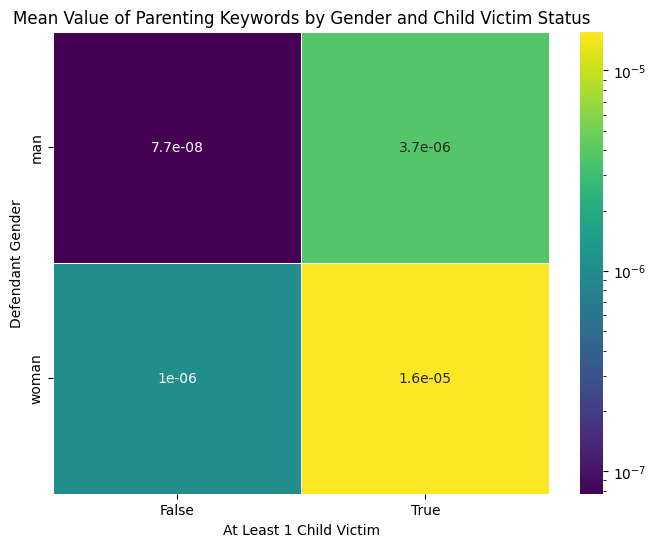

In [131]:
heatmap_data1 = grouped_data1.unstack()

# 3. Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data1, norm=LogNorm(),  annot=True, cmap='viridis', linewidths=.5)
plt.title('Mean Value of Parenting Keywords by Gender and Child Victim Status')
plt.xlabel('At Least 1 Child Victim')
plt.ylabel('Defendant Gender')
plt.show()

In [132]:
grouped_data = child_victim_analysis.groupby(['gender','child_victim'])['Name'].nunique()

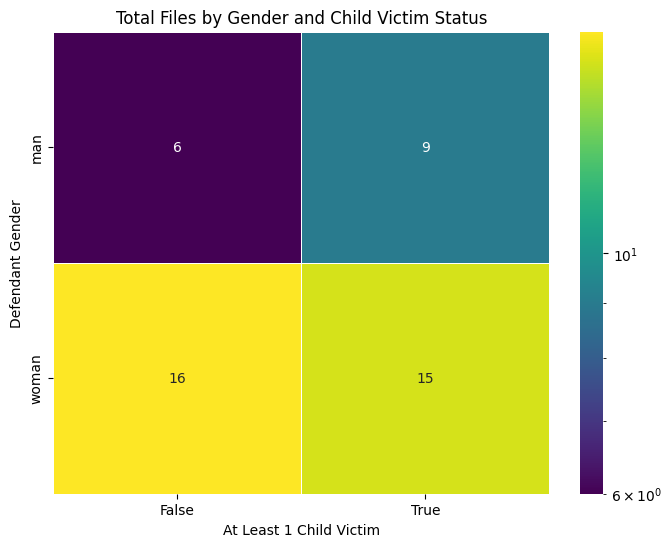

In [133]:
heatmap_data = grouped_data.unstack()

# 3. Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, norm=LogNorm(),  annot=True, cmap='viridis', linewidths=.5)
plt.title('Total Files by Gender and Child Victim Status')
plt.xlabel('At Least 1 Child Victim')
plt.ylabel('Defendant Gender')
plt.show()

/tmp/ipython-input-3309628849.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations = heatmap_data1.applymap(lambda x: f'{x:.7f}') + '\n(' + heatmap_data.astype(str) + ')'


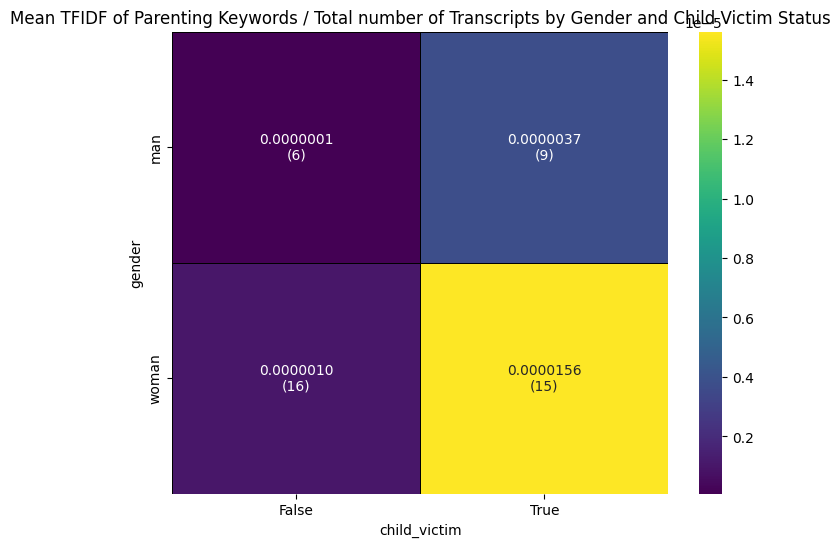

In [141]:
annotations = heatmap_data1.applymap(lambda x: f'{x:.7f}') + '\n(' + heatmap_data.astype(str) + ')'

# 3. Plot the heatmap with custom annotations
plt.figure(figsize=(8, 6))
# sns.heatmap(heatmap_data1, annot=annotations, cmap="viridis", linewidths=.5, linecolor='black')

sns.heatmap(heatmap_data1, annot=annotations, fmt="", cmap="viridis", linewidths=.5, linecolor='black')

plt.title("Mean TFIDF of Parenting Keywords / Total number of Transcripts by Gender and Child Victim Status")
plt.show()

In [135]:
heatmap_data1

child_victim,False,True
gender,,
man,7.724471e-08,0.000004
woman,1.029729e-06,0.000016


In [137]:
	7.724471e-08 < 0.000016

True